# Example: Bioeconomic Model

Miranda and Fackler, Applied Computational Economics and Finance, 2002, Section 7.6.6

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
import quantecon as qe
from quantecon.markov import DiscreteDP, backward_induction, sa_indices

In [3]:
s_bar = 8  # Energy carrying capacity
n = s_bar + 1  # Number of states, 0, ..., s_bar
m = 3  # Number of areas (actions), 0, ..., m-1
e = [2, 4, 5]  # Energy offerings
p = [1.0, 0.7, 0.8]  # Survival probabilities
q = [0.5, 0.8, 0.7]  # Success probabilities

T = 10  # Time horizon

# Terminal values
v_term = np.empty(n)
v_term[0], v_term[1:] = 0, 1

We follow the state-action pairs formulation approach.

In [4]:
L = n * m  # Number of feasible state-action pairs
s_indices, a_indices = sa_indices(n, m)

In [5]:
# Reward vector
R = np.zeros(L)

In [6]:
# Transition probability array
Q = sp.lil_matrix((L, n))
it = np.nditer((s_indices, a_indices), flags=['c_index'])
for s, k in it:
    i = it.index
    if s == 0:
        Q[i, 0] = 1
    else:
        Q[i, np.minimum(s_bar, s-1+e[k])] = p[k] * q[k]
        Q[i, s-1] = p[k] * (1 - q[k])
        Q[i, 0] = 1 - p[k]

In [7]:
# Discount factor
beta = 1

In [8]:
ddp = DiscreteDP(R, Q, beta, s_indices, a_indices)

Let us use the `backward_induction` routine to solve our finite-horizon problem.

In [9]:
vs, sigmas = backward_induction(ddp, T, v_term)

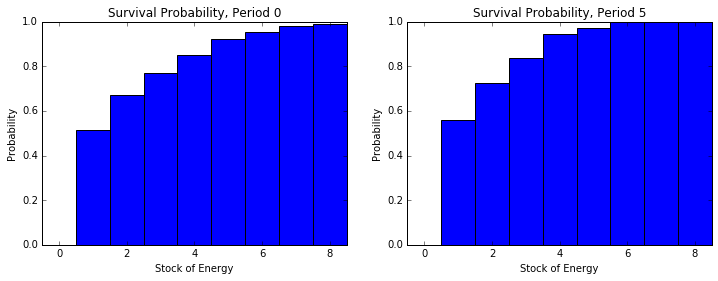

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

ts = [0, 5]
for i, t in enumerate(ts):
    axes[i].bar(np.arange(n), vs[t], align='center', width=1)
    axes[i].set_xlim(0-0.5, s_bar+0.5)
    axes[i].set_xlabel('Stock of Energy')
    axes[i].set_ylabel('Probability')
    axes[i].set_title('Survival Probability, Period {t}'.format(t=t))

plt.show()